# Things to add to the Project:

1. Word Clouds
2. Top reviewers scores for albums
3. Top reviewers scores by genre & differences

In [357]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting

In [358]:
# Download the dataset from Kaggle at https://www.kaggle.com/bcyphers/pitchfork-reviews/download
# Extract the zip and retrieve "reviews.csv"

In [359]:
raw_data = pd.read_csv("C:/Users/Home/Downloads/reviews.csv/reviews.csv")
raw_data.head(3)

,reviewid,Unnamed: 0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist
0,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,1,prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,2,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


In [360]:
# Drop columns we won't be needing
raw_data.drop(['url', 'pub_weekday', 'pub_day', 'pub_month',  'reviewid.1', 'Unnamed: 0'], axis = 1, inplace = True)
raw_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,9.3,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,prelapsarian,7.9,0,zoe camp,contributor,2017-01-07,2017,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,all of them naturals,7.3,0,david glickman,contributor,2017-01-07,2017,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


In [361]:
# Check the datatypes of the dataset
# raw_data['author'] = raw_data['author'].astype(str)
raw_data.dtypes

reviewid            int64
title              object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_year            int64
content            object
genre              object
label              object
artist             object
dtype: object

In [362]:
# Check for null values in the dataset
print(pd.isnull(raw_data).sum())

# fill in the null values for the genre column
raw_data['genre'].fillna("No Genre", inplace = True)

reviewid             0
title                2
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_year             0
content             10
genre             2364
label               47
artist               2
dtype: int64


### Change the score of albums to whole numbers

In [363]:
# Change the score number to a whole number ranging from 1 - 100
increase_score = raw_data['score'] * 10

In [364]:
raw_data['score'] = increase_score
raw_data['score'] = raw_data['score'].astype(int)
raw_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,93,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
1,22721,prelapsarian,79,0,zoe camp,contributor,2017-01-07,2017,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,krallice
2,22659,all of them naturals,73,0,david glickman,contributor,2017-01-07,2017,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,uranium club


### Create two dataframes based on if an author has less than 100 reviews/more than or equal to 100 reviews

In [365]:
strings = raw_data['author'].value_counts()[:52].index # 52 authors over 100 reviews or more

# Create a list containing the authors with >= 100 reviews
author_names = []
for x in strings:
    author_names.append(x)

In [366]:
raw_data['author'].value_counts(normalize = True)[:52].sum() # percentage of all reviews

0.6833260822275397

In [367]:
(raw_data['author'].value_counts() >= 100).sum() # proves how many authors have over 100 reviews or more

52

In [368]:
author_less = []
strings = raw_data['author'].value_counts()[52:].index
for x in strings:
    author_less.append(x)

In [369]:
# get the indices of the authors with >= 100 reviews, needed for data cleaning
keep_indices = []
increment = -1
for i in raw_data['author']: # iterate through the author column of the dataframe
    increment += 1 # increase when the iteration for the row has been complete to check if the author is in the list
    for j in range(len(author_names)): # iterate through the names with >= 100 reviews
        if i == author_names[j]: # check if they are the same
           keep_indices.append(increment) # append the indice

In [370]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(keep_indices))
print(raw_data['author'].value_counts()[:52].sum())

12565
12565


In [371]:
# get the indices we want to drop
remove_indices = []
increment = -1
for i in raw_data['author']:
    increment += 1
    for j in range(len(author_less)):
        if i == author_less[j]:
            remove_indices.append(increment)

In [372]:
# compare if the amonut of reviews is the same as the authors total reviews with >= 100 
print(len(remove_indices))
print(raw_data['author'].value_counts()[52:].sum())

5823
5823


In [373]:
subdata = raw_data.drop(remove_indices)
subdata['author'].value_counts() # check if the <= 100 reviews have been removed

joe tangari             815
stephen m. deusner      725
ian cohen               699
brian howe              500
mark richardson         476
stuart berman           445
marc hogan              439
nate patrin             347
marc masters            312
jayson greene           299
grayson currin          289
brandon stosuy          287
matthew murphy          274
dominique leone         273
jess harvell            273
andrew gaerig           270
jason crock             267
rob mitchum             267
andy beta               249
paul thompson           222
joshua klein            217
larry fitzmaurice       217
chris dahlen            214
nick neyland            211
philip sherburne        209
adam moerder            209
tom breihan             208
amanda petrusich        200
matt lemay              196
ryan dombal             174
mike powell             160
david raposa            155
zach kelly              153
sam ubl                 152
nitsuh abebe            144
grayson haver currin

In [374]:
# created dataframe with authors < 100 reviews
less100data = raw_data.drop(keep_indices)
less100data['author'].value_counts()

aaron leitko                                                   97
brent dicrescenzo                                              93
zach baron                                                     89
tim finney                                                     86
ryan schreiber                                                 85
rebecca raber                                                  84
jonah bromwich                                                 81
david bevan                                                    80
matthew perpetua                                               70
brad haywood                                                   69
zoe camp                                                       69
andy o'connor                                                  67
david drake                                                    66
jason nickey                                                   65
cory d. byrom                                                  63
kim kelly 

### Amount of reviews for authors with over 100

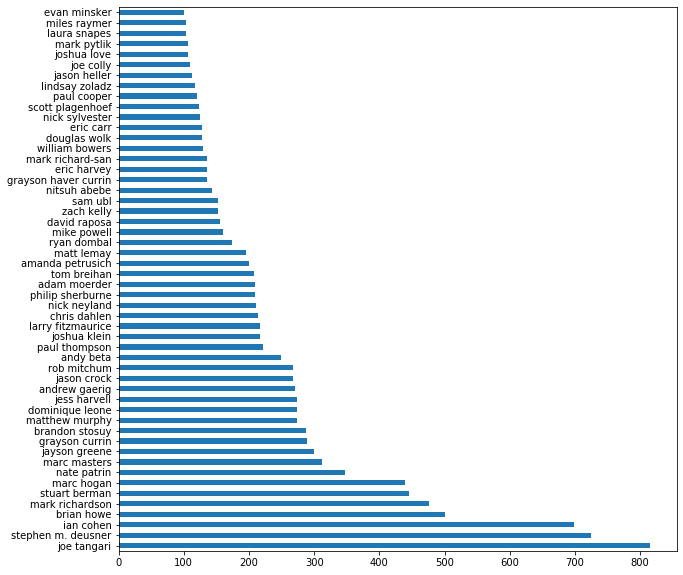

In [375]:
plt.figure(figsize = (10,10))
subdata['author'].value_counts().plot(kind='barh')

### Differentiation of Top 52 vs All vs Under 52 authors 

In [376]:
total = raw_data['genre'].value_counts(ascending = True)
authors100 = subdata['genre'].value_counts(ascending = True)
less100 = less100data['genre'].value_counts(ascending = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

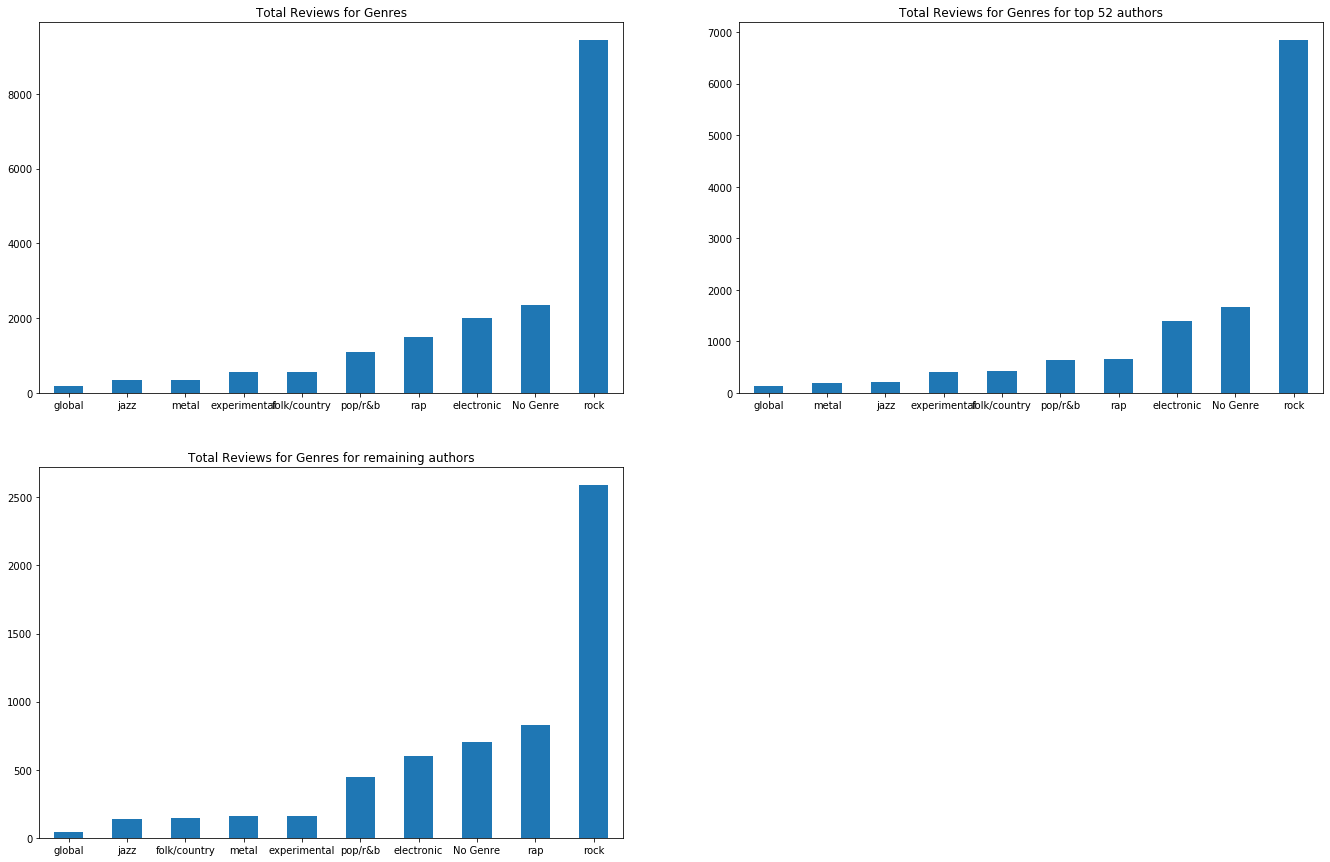

In [377]:
fig = plt.figure(figsize = (23, 15), edgecolor = 'Red')


ax1 = fig.add_subplot(2, 2, 1)
total.plot(ax = ax1, kind = 'bar', title = 'Total Reviews for Genres')
plt.xticks(rotation = 'horizontal')

ax2 = fig.add_subplot(2, 2, 2)
authors100.plot(ax = ax2, kind = 'bar', title = 'Total Reviews for Genres for top 52 authors')
plt.xticks(rotation = 'horizontal')

ax3 = fig.add_subplot(2, 2, 3)
less100.plot(ax = ax3, kind = 'bar', title = 'Total Reviews for Genres for remaining authors')
plt.xticks(rotation = 'horizontal')

In [378]:
# Solution to separating the genres for authors with >= 100 reviews for Pitchfork
rap_data = subdata[subdata['genre'] == 'rap']
electronic_data = subdata[subdata['genre'] == 'electronic']
pop_and_rb_data = subdata[subdata['genre'] == 'pop/r&b']
experimental_data = subdata[subdata['genre'] == 'experimental']
metal_data = subdata[subdata['genre'] == 'metal']
global_data = subdata[subdata['genre'] == 'global']
rock_data = subdata[subdata['genre'] == 'rock']
folk_and_country_data = subdata[subdata['genre'] == 'folk/country']
jazz_data = subdata[subdata['genre'] == 'jazz']

In [379]:
# Another Solution to separating the genres, but takes longer to do compared to the first solution
electronic = (subdata['genre'] == 'electronic')
electronic_data = subdata[electronic]
electronic_data.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
0,22703,mezzanine,93,0,nate patrin,contributor,2017-01-08,2017,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,massive attack
7,22694,tehillim,70,0,andy beta,contributor,2017-01-05,2017,"For the last thirty years, Israel’s electronic...",electronic,stroboscopic artefacts,yotam avni
24,22713,the wasp factory,73,0,brian howe,contributor,2016-12-27,2016,How do you stage an opera that mostly takes pl...,electronic,bedroom community,ben frost


### Best New Music scores through the years

In [380]:
best_new_music = raw_data[raw_data['best_new_music'] == 1] # grab all the rows with a 1 that represents it got best new music by Pitchfork
best_new_music.head(3)

,reviewid,title,score,best_new_music,author,author_type,pub_date,pub_year,content,genre,label,artist
3,22661,first songs,90,1,jenn pelly,associate reviews editor,2017-01-06,2017,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,"kleenex, liliput"
11,22745,run the jewels 3,86,1,sheldon pearce,associate staff writer,2017-01-03,2017,"On 2006’s “That’s Life,” Killer Mike boasted “...",rap,self-released,run the jewels
28,22707,swiss radio days vol. 41 - zurich 1961,90,1,seth colter-walls,contributor,2016-12-22,2016,All is not well with Ray Charles’ catalog nowa...,jazz,challenge,ray charles


In [381]:
best_new_music['pub_year'].unique() # find out the years range for best new music

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003], dtype=int64)

([<matplotlib.axis.XTick at 0x15c19c5f3c8>,
 <a list of 14 Text xticklabel objects>)

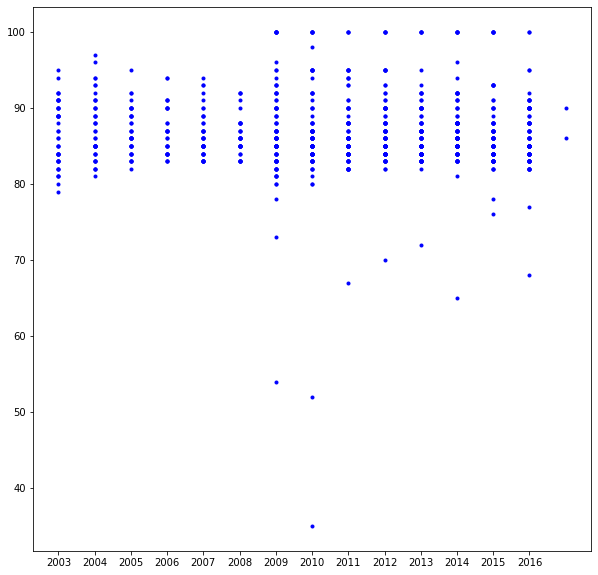

In [382]:
x = best_new_music['pub_year']
y = best_new_music['score']

plt.figure(figsize = (10, 10))
plt.plot(x, y, 'b.')
plt.xticks(np.arange(2003, 2017))

### Best Music Labels

In [383]:
raw_data['label'].value_counts()

self-released            420
drag city                269
sub pop                  266
thrill jockey            244
merge                    239
warp                     209
domino                   204
matador                  202
columbia                 199
mute                     159
warner bros.             154
astralwerks              149
jagjaguwar               145
interscope               137
secretly canadian        131
atlantic                 130
4ad                      123
kranky                   115
rough trade              113
capitol                  108
polyvinyl                107
virgin                   103
def jam                  102
xl                       101
temporary residence       97
relapse                   93
stones throw              91
anti-                     90
kill rock stars           90
ninja tune                89
                        ... 
strange lane               1
madrona                    1
trax                       1
fayettenam    

In [384]:
label_data = pd.DataFrame(columns = ['label name', 'total score', 'total albums', 'average score'])
label_data.head()

,label name,total score,total albums,average score


In [385]:
# Grab the label names first 
label_names = []
for i in raw_data['label'].index:
    name = raw_data.loc[i, 'label']
    
    if name in label_names:
        continue;
    else:
        label_names.append(name)

In [386]:
label_data['label name'] = label_names
label_data.head()

,label name,total score,total albums,average score
0,virgin,NaN,NaN,NaN
1,hathenter,NaN,NaN,NaN
2,static shock,NaN,NaN,NaN
3,kill rock stars,NaN,NaN,NaN
4,teklife,NaN,NaN,NaN


In [387]:
scores = []
total_albums = []
for i in label_data['label name']:
    temp_data = raw_data[raw_data['label'] == i]
    temp_score = temp_data['score'].sum()
    temp_album = len(temp_data)
    
    scores.append(temp_score)
    total_albums.append(temp_album)

In [388]:
label_data['total score'] = scores
label_data['total albums'] = total_albums
label_data['average score'] = label_data['total score'] / label_data['total albums']

label_data.head()

,label name,total score,total albums,average score
0,virgin,6617,103,64.242718
1,hathenter,79,1,79.000000
2,static shock,156,2,78.000000
3,kill rock stars,6321,90,70.233333
4,teklife,222,3,74.000000


##### Top 20 labels based on having at least 10 albums reviewed and average score


In [389]:
label_data[label_data['total albums'] >= 10]\
    .sort_values(by = 'average score', ascending = False)[:20]['label name']

108           dust-to-digital
1606             hip-o select
141                      stax
2366                   ~scape
2053    table of the elements
81                modern love
178     paradise of bachelors
1821                   tzadik
273                       mca
723           sincerely yours
166      what's your rupture?
15                  soul jazz
101        light in the attic
48               numero group
640                     touch
215                       ecm
44                     legacy
151              20 buck spin
227                    motown
386                 young god
Name: label name, dtype: object

## Create new dataframe: Find the total score, total albums, average score, genre of all artists

In [390]:
artist_data = pd.DataFrame(columns = ['Artist', 'Total Score', 'Total Albums', 'Average Score', 'Genre'])
artist_data

,Artist,Total Score,Total Albums,Average Score,Genre


In [391]:
# Grab the artist names first 
artist_names = []
for i in raw_data['artist'].index:
    name = raw_data.loc[i, 'artist']
    
    if name in artist_names:
        continue;
    else:
        artist_names.append(name)

In [392]:
artist_data['Artist'] = artist_names
artist_data.head(3)

,Artist,Total Score,Total Albums,Average Score,Genre
0,massive attack,NaN,NaN,NaN,NaN
1,krallice,NaN,NaN,NaN,NaN
2,uranium club,NaN,NaN,NaN,NaN


In [393]:
artist_data.drop(2731, inplace = True)

In [ ]:
scores = []
total_albums = []
genres = []
for i in artist_data['Artist']:
    temp_data = raw_data[raw_data['artist'] == i]
    temp_score = temp_data['score'].sum()
    temp_album = len(temp_data)
    temp_genre = (temp_data['genre']).value_counts().index[0]
    
    scores.append(temp_score)
    total_albums.append(temp_album)
    genres.append(temp_genre)

In [ ]:
artist_data['Total Score'] = scores
artist_data['Total Albums'] = total_albums
artist_data['Genre'] = genres

In [ ]:
# Get the average score for each artist
artist_data['Average Score'] = artist_data['Total Score'] / artist_data['Total Albums']
artist_data.head(3)

### Score differences between genres

In [ ]:
artist_data.hist('Average Score', 'genre', figsize = (20, 10), bins = 10)

### Top 50 Best & Worst reviewed artists based on average score

In [ ]:
best_artists = artist_data.sort_values(by = 'Average Score', ascending = False)[:50]

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(best_artists['Artist'], best_artists['Average Score'])

In [ ]:
worst_artists = artist_data.sort_values(by = 'Average Score', ascending = True)[:50]

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(worst_artists['Artist'], worst_artists['Average Score'])